<a href="https://colab.research.google.com/github/caiogasparine/SCS_3253_061-Machine-Learning/blob/main/Toronto_Police_MCI_with_pyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
### Toronto Police / MCI indicators
### Created on March 16, 2023 / Last update March 17, 2023
### Pycaret version
### https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Clustering.ipynb
###

import numpy as np
import pandas as pd
from datetime import date
import warnings                    #These 2 lines remove all the warnigns in the code  
warnings.filterwarnings("ignore")  #These 2 lines remove all the warnigns in the code  
from google.colab import drive
from google.colab import data_table        #Mar 16, 2023 - Interactive Tables for DataFrames 
data_table.enable_dataframe_formatter()    #Mar 16, 2023 - Interactive Tables for Dataframes 

#!pip install pycaret
!pip install --pre pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# check installed version
import pycaret
pycaret.__version__

'3.0.0'

In [9]:
### Change the code here, depending on your dataset location
### data = pd.read_csv('Major_Crime_Indicators.csv', header=0)
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Major_Crime_Indicators.csv', header=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data.shape

(301233, 30)

In [11]:
data.head(5)

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.850398e+06,5.429359e+06,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8.818405e+06,5.436836e+06,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8.853791e+06,5.402071e+06,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8.832822e+06,5.419628e+06,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8.853452e+06,5.410706e+06,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5


In [12]:
### Exploring the data to gain insigths
### Defining our scope with years with complete data year = 2013 ONLY

### ocurrencedate min = 9/6/1966 and year = NULL AND ocurrencedata max = 30/06/2022
### Clearning the dataset to have only the occurences for 2013 to save computing
data = data[data.occurrenceyear == 2013]
data = data.drop(columns=['X', 'Y', 'Index_', 'event_unique_id', 'reporteddate', 'reporteddayofyear', 'reportedyear', 'reporteddayofweek', 'reportedmonth', 'reportedday', 'reportedhour', 'occurrencedayofyear' ])

In [13]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(596, 18)"
2,Transformed data shape,"(596, 521)"
3,Numeric features,8
4,Categorical features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [14]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [15]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [16]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(596, 18)"
2,Transformed data shape,"(596, 521)"
3,Numeric features,8
4,Categorical features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [17]:
## CREATE MODEL


In [18]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7331,4398.1905,0.4581,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [20]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7297,2832.9237,0.4196,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [21]:
## ASSIGN MODEL


In [22]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Division,occurrencedate,location_type,premises_type,ucr_code,ucr_ext,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId,Cluster
7,D14,2013/12/31 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2132,200,Theft From Motor Vehicle Over,2013.0,December,31.0,Tuesday,11,Theft Over,81,Trinity-Bellwoods,-79.418747,43.654457,8,Cluster 1
15,D14,2013/12/18 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,2120,200,B&E,2013.0,December,18.0,Wednesday,19,Break and Enter,82,Niagara,-79.413918,43.638672,16,Cluster 1
28,D43,2013/12/20 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,210,Theft Of Motor Vehicle,2013.0,December,20.0,Friday,3,Auto Theft,127,Bendale,-79.251541,43.747467,29,Cluster 1
42,D53,2013/11/27 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,2013.0,November,27.0,Wednesday,20,Assault,102,Forest Hill North,-79.423950,43.705681,43,Cluster 1
53,D32,2013/12/25 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,200,B&E,2013.0,December,25.0,Wednesday,18,Break and Enter,39,Bedford Park-Nortown,-79.420731,43.727291,54,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271440,D32,2013/09/01 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,2013.0,September,1.0,Sunday,0,Assault,36,Newtonbrook West,-79.429634,43.794212,271441,Cluster 0
272883,D55,2013/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,2013.0,January,1.0,Tuesday,0,Assault,54,OConnor-Parkview,-79.303520,43.711826,272884,Cluster 0
276209,D41,2013/10/01 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,2013.0,October,1.0,Tuesday,14,Assault,122,Birchcliffe-Cliffside,-79.276543,43.690643,276210,Cluster 0
289994,D51,2013/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,2013.0,January,1.0,Tuesday,0,Assault,72,Regent Park,-79.362671,43.659428,289995,Cluster 0


In [23]:
## ANALYSE MODEL

In [24]:
# plot pca cluster plot 
plot_model(kmeans, plot = 'cluster')

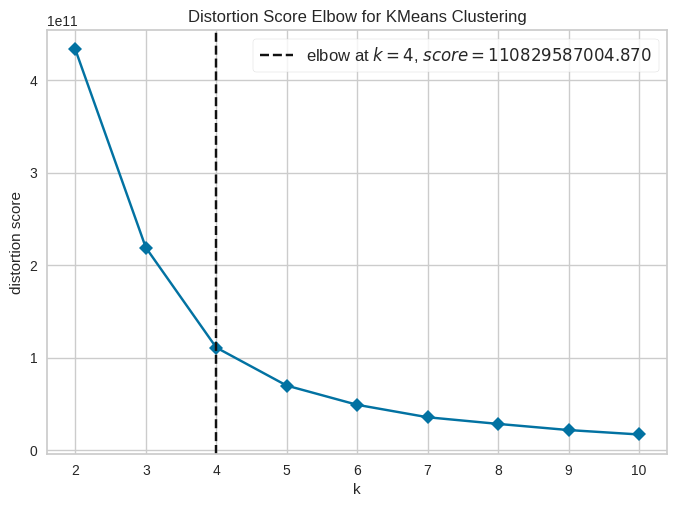

In [25]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

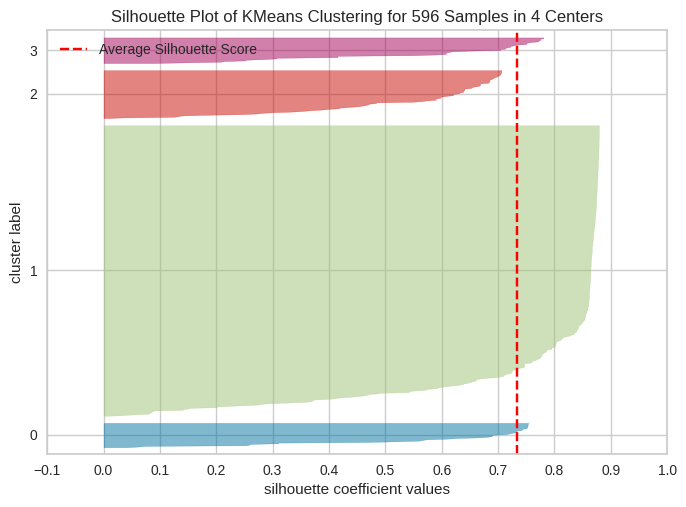

In [26]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

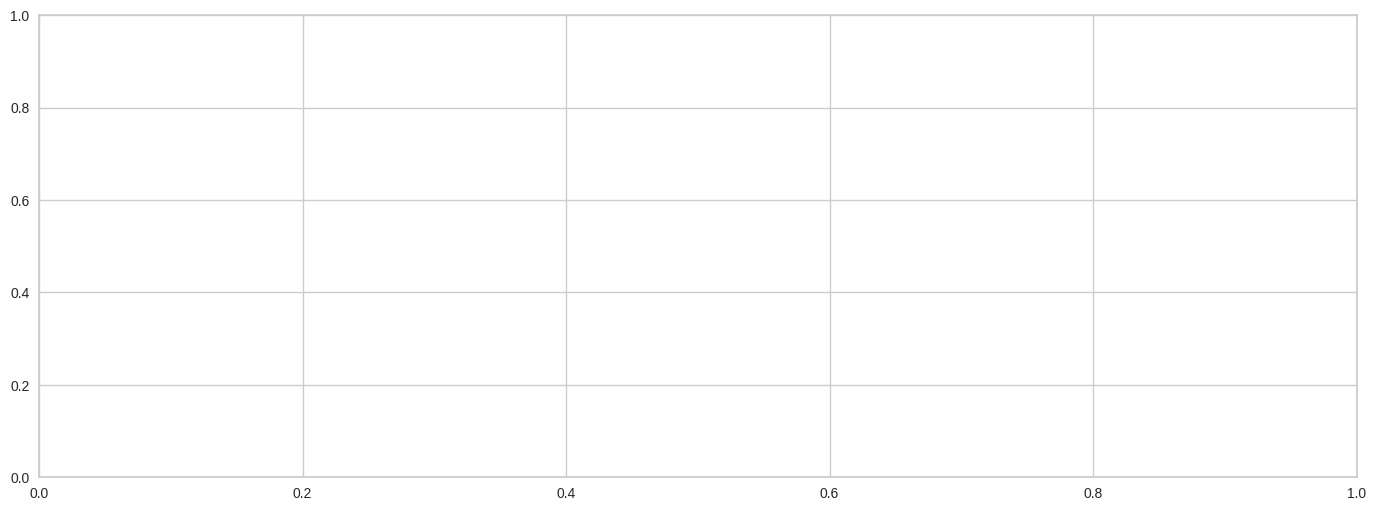

In [27]:
# check docstring to see available plots 
# help(plot_model)
evaluate_model(kmeans)

In [28]:
##PREDICTION

In [29]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Division_D14,Division_D43,Division_D53,Division_D32,Division_D52,Division_D31,Division_D55,Division_D23,Division_D22,Division_D11,...,Neighbourhood_Broadview North,Neighbourhood_Kingsway South,Neighbourhood_High Park North,Neighbourhood_Cliffcrest,Neighbourhood_St.Andrew-Windfields,Neighbourhood_Alderwood,Longitude,Latitude,ObjectId,Cluster
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.418745,43.654456,8.0,Cluster 1
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.413916,43.638670,16.0,Cluster 1
28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.251540,43.747469,29.0,Cluster 1
42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.423947,43.705682,43.0,Cluster 1
53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.420731,43.727292,54.0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271440,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.429631,43.794213,271441.0,Cluster 0
272883,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.303517,43.711826,272884.0,Cluster 0
276209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.276540,43.690642,276210.0,Cluster 0
289994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.362674,43.659429,289995.0,Cluster 0


In [30]:
## SAVE MODEL

In [31]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ucr_code', 'ucr_ext',
                                              'occurrenceyear', 'occurrenceday',
                                              'occurrencehour', 'Longitude',
                                              'Latitude', 'ObjectId'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Division', 'occurrencedate',
                                              'location_type', 'premises_type...
                                              'occurrencedayofweek',
                                              'mci_category', 'Hood_ID',
                                              'Neighbourhood'],
                                     transformer=OneHotEncoder(cols=['Division',
                                                           

In [32]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ucr_code', 'ucr_ext',
                                             'occurrenceyear', 'occurrenceday',
                                             'occurrencehour', 'Longitude',
                                             'Latitude', 'ObjectId'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Division', 'occurrencedate',
                                             'location_type', 'premises_type...
                                             'occurrencedayofweek',
                                             'mci_category', 'Hood_ID',
                                             'Neighbourhood'],
                                    transformer=OneHotEncoder(cols=['Division',
                                                                    'occurrencedate',
                                                                    'location_type',
                                                                    'premises_type',
                                                                    'offence',
                                                                    'occurrencemonth',
                                                                    'occurrencedayofweek',
                                                                    'mci_category',
                                                                    'Hood_ID',
                                                                    'Neighbourhood'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [33]:
## Detailed function-by-function overview

In [34]:
# init setup
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(596, 18)"
2,Transformed data shape,"(596, 521)"
3,Numeric features,8
4,Categorical features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [35]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [36]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Division_D14,Division_D43,Division_D53,Division_D32,Division_D52,Division_D31,Division_D55,Division_D23,Division_D22,Division_D11,...,Neighbourhood_Yonge-Eglinton,Neighbourhood_Broadview North,Neighbourhood_Kingsway South,Neighbourhood_High Park North,Neighbourhood_Cliffcrest,Neighbourhood_St.Andrew-Windfields,Neighbourhood_Alderwood,Longitude,Latitude,ObjectId
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.418747,43.654457,8.0
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.413918,43.638672,16.0
28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.251541,43.747467,29.0
42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.423950,43.705681,43.0
53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.420731,43.727291,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271440,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.429634,43.794212,271441.0
272883,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.303520,43.711826,272884.0
276209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.276543,43.690643,276210.0
289994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.362671,43.659428,289995.0


In [37]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [38]:
# init setup with normalize = True

s = setup(data, session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Original data shape,"(596, 18)"
2,Transformed data shape,"(596, 521)"
3,Numeric features,8
4,Categorical features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


<Axes: >

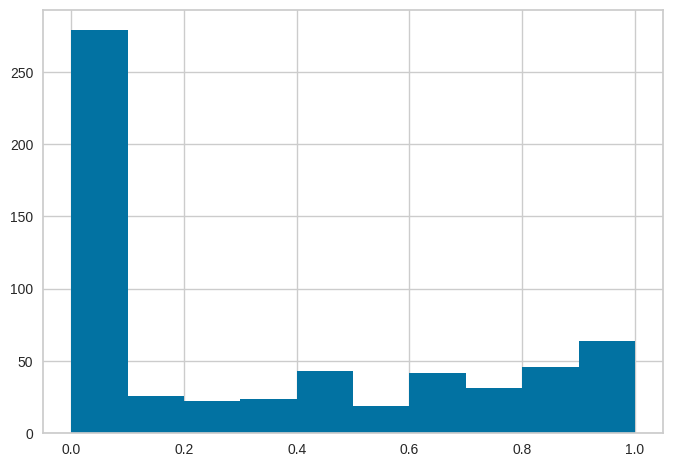

In [39]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['occurrenceday'].hist()

<Axes: >

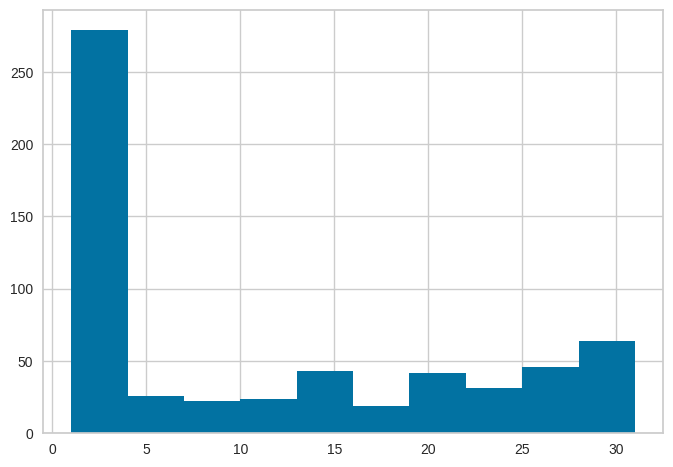

In [40]:
get_config('X_train')['occurrenceday'].hist()

In [41]:
# check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [42]:
# train kmeans
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0816,41.9018,3.1756,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [43]:
kmeans_results = pull()
print(type(kmeans_results))
kmeans_results

<class 'pandas.core.frame.DataFrame'>


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0816,41.9018,3.1756,0,0,0


In [44]:
# train kmeans with 10 clusters
create_model('kmeans', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0924,25.2316,2.7486,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=10, random_state=123)

In [45]:
assign_model(kmeans)

,Division,occurrencedate,location_type,premises_type,ucr_code,ucr_ext,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId,Cluster
7,D14,2013/12/31 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2132,200,Theft From Motor Vehicle Over,2013.0,December,31.0,Tuesday,11,Theft Over,81,Trinity-Bellwoods,-79.418747,43.654457,8,Cluster 1
15,D14,2013/12/18 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,2120,200,B&E,2013.0,December,18.0,Wednesday,19,Break and Enter,82,Niagara,-79.413918,43.638672,16,Cluster 1
28,D43,2013/12/20 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,210,Theft Of Motor Vehicle,2013.0,December,20.0,Friday,3,Auto Theft,127,Bendale,-79.251541,43.747467,29,Cluster 1
42,D53,2013/11/27 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,2013.0,November,27.0,Wednesday,20,Assault,102,Forest Hill North,-79.423950,43.705681,43,Cluster 3
53,D32,2013/12/25 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,200,B&E,2013.0,December,25.0,Wednesday,18,Break and Enter,39,Bedford Park-Nortown,-79.420731,43.727291,54,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271440,D32,2013/09/01 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,2013.0,September,1.0,Sunday,0,Assault,36,Newtonbrook West,-79.429634,43.794212,271441,Cluster 2
272883,D55,2013/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,2013.0,January,1.0,Tuesday,0,Assault,54,OConnor-Parkview,-79.303520,43.711826,272884,Cluster 2
276209,D41,2013/10/01 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,2013.0,October,1.0,Tuesday,14,Assault,122,Birchcliffe-Cliffside,-79.276543,43.690643,276210,Cluster 2
289994,D51,2013/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,2013.0,January,1.0,Tuesday,0,Assault,72,Regent Park,-79.362671,43.659428,289995,Cluster 3


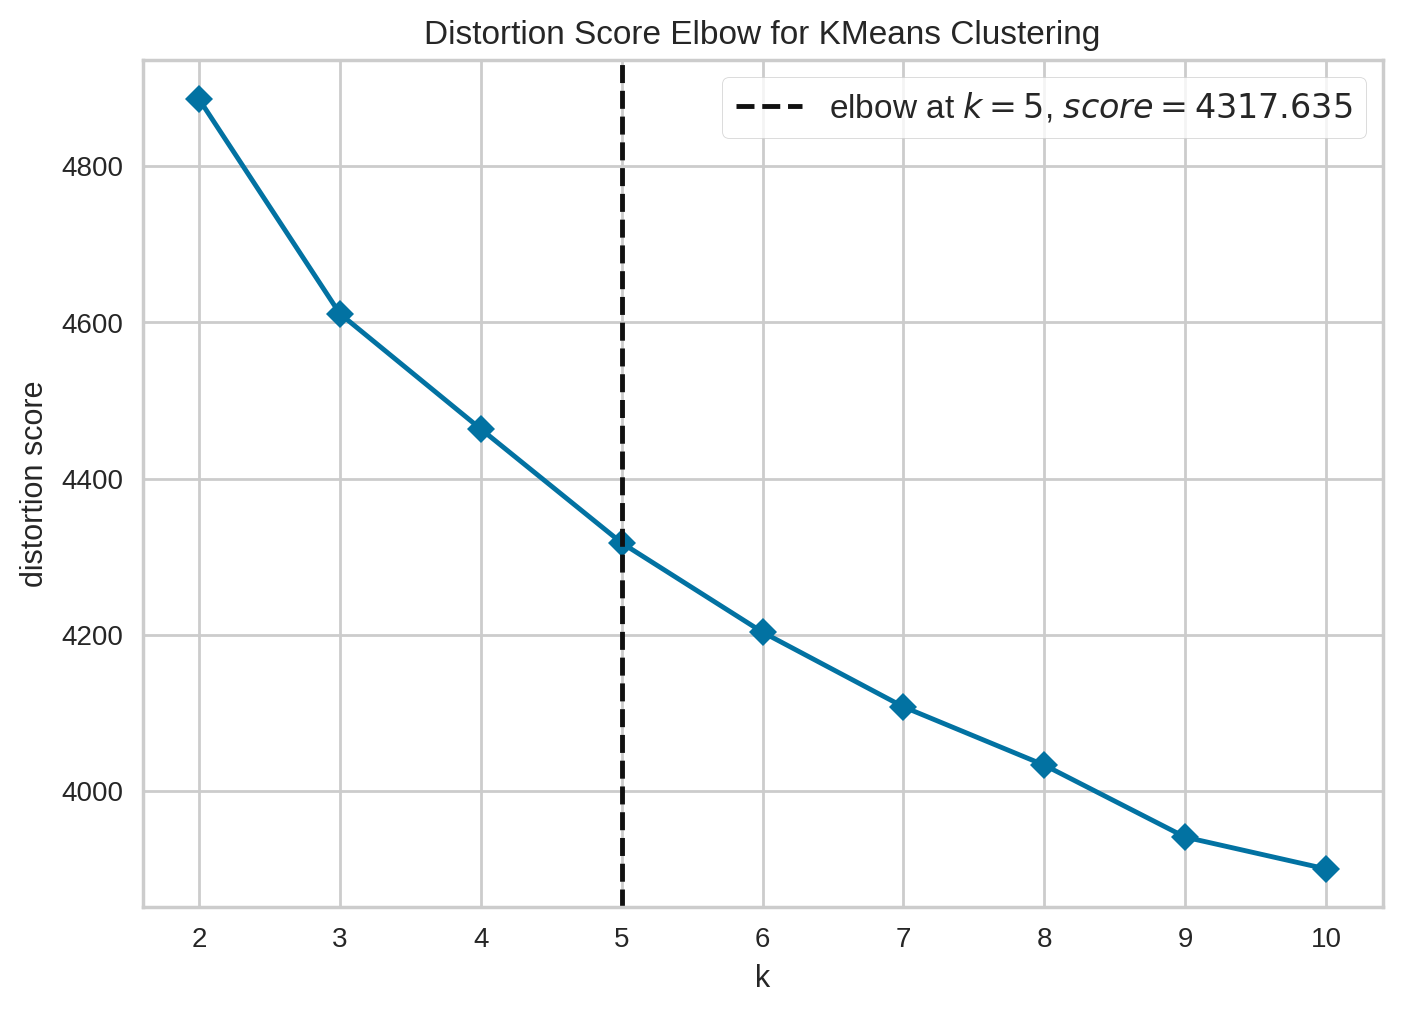

In [46]:
# to control the scale of plot
plot_model(kmeans, plot = 'elbow', scale = 2)

In [47]:
# to save the plot
plot_model(kmeans, plot = 'elbow', save=True)

'Elbow Plot.png'

In [48]:
# save model
save_model(kmeans, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ucr_code', 'ucr_ext',
                                              'occurrenceyear', 'occurrenceday',
                                              'occurrencehour', 'Longitude',
                                              'Latitude', 'ObjectId'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Division', 'occurrencedate',
                                              'location_type', 'premises_type...
                                     transformer=OneHotEncoder(cols=['Division',
                                                                     'occurrencedate',
                                                                     'location_type',
                                                                     'premises_type',
      

In [49]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ucr_code', 'ucr_ext',
                                             'occurrenceyear', 'occurrenceday',
                                             'occurrencehour', 'Longitude',
                                             'Latitude', 'ObjectId'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Division', 'occurrencedate',
                                             'location_type', 'premises_type...
                                    transformer=OneHotEncoder(cols=['Division',
                                                                    'occurrencedate',
                                                                    'location_type',
                                                                    'premises_type',
                                                                    'offence',
                                                                    'occurrencemonth',
                                                                    'occurrencedayofweek',
                                                                    'mci_category',
                                                                    'Hood_ID',
                                                                    'Neighbourhood'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [50]:
# save experiment
save_experiment('my_experiment')

In [51]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(596, 18)"
2,Transformed data shape,"(596, 521)"
3,Numeric features,8
4,Categorical features,10
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1
